In [ ]:
!pip install fastparquet

In [3]:
import dask.dataframe as dd
from adlfs import AzureBlobFileSystem

# Not used directly, but either fastparquet or pyarrow needs to be installed
import fastparquet

storage_account_name = 'cpdataeuwest'
folder_name = 'cpdata/raw/fia'

In [4]:
fs = AzureBlobFileSystem(account_name=storage_account_name)
parquet_files = fs.glob(folder_name + '/*parquet')
print('Found {} Parquet files'.format(len(parquet_files)))
for k in range(0,10):
    print(parquet_files[k])
print('...')

Found 60 Parquet files
cpdata/raw/fia/boundary.parquet
cpdata/raw/fia/cond.parquet
cpdata/raw/fia/cond_dwm_calc.parquet
cpdata/raw/fia/county.parquet
cpdata/raw/fia/dwm_coarse_woody_debris.parquet
cpdata/raw/fia/dwm_duff_litter_fuel.parquet
cpdata/raw/fia/dwm_fine_woody_debris.parquet
cpdata/raw/fia/dwm_microplot_fuel.parquet
cpdata/raw/fia/dwm_residual_pile.parquet
cpdata/raw/fia/dwm_transect_segment.parquet
...


In [42]:
search_term = 'plot'
plot = [f for f in parquet_files if f'{search_term}.parquet' in f]
query = plot[1]

In [43]:
df = dd.read_parquet(f'az://{query}',
                     storage_options={'account_name':storage_account_name}).compute()

In [53]:
s = df[['INVYR', 'MEASYEAR', 'MEASMON', 'MEASDAY']].dropna()

1495331
1495331


In [72]:
import pandas as pd
import math
import numpy as np
datetime = [f"{int(a['MEASYEAR'])}-{int(a['MEASMON'])}-{math.ceil(a['MEASDAY'])}" for _,a in s.iterrows()]
dt = []
for d in datetime:
    try:
        dt.append(pd.to_datetime(d, format='%Y-%m-%d'))
    except:
        dt.append(np.nan)

In [86]:
s['DATETIME'] = dt
print(len(s)-len(s.dropna()))

374861


(array([  133.,   351.,   231.,   635., 12819., 12716.,   365.,  6539.,
         1167.,  1282.,  9631.,   667.,   452.,   834., 11774.,  1523.,
         5224.,  1450.,  4346.,  2000.,  9463.,  7030.,  9775.,  8315.,
        13842., 23561., 30178., 38042., 43172., 41120., 42158., 56887.,
        46215., 36075., 48237., 43321., 29492., 48009., 50093., 53731.,
        51369., 39842., 28194., 43051., 42973., 43874., 43491., 32797.,
        35884.,  6140.]),
 array([ 3103.  ,  3408.04,  3713.08,  4018.12,  4323.16,  4628.2 ,
         4933.24,  5238.28,  5543.32,  5848.36,  6153.4 ,  6458.44,
         6763.48,  7068.52,  7373.56,  7678.6 ,  7983.64,  8288.68,
         8593.72,  8898.76,  9203.8 ,  9508.84,  9813.88, 10118.92,
        10423.96, 10729.  , 11034.04, 11339.08, 11644.12, 11949.16,
        12254.2 , 12559.24, 12864.28, 13169.32, 13474.36, 13779.4 ,
        14084.44, 14389.48, 14694.52, 14999.56, 15304.6 , 15609.64,
        15914.68, 16219.72, 16524.76, 16829.8 , 17134.84, 17439.88

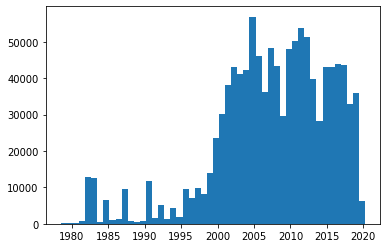

In [96]:
import matplotlib.pyplot as plt
plt.hist(s['DATETIME'], bins=50)

(array([105030.,   3415.,   3294.,   3188.,   3569.,   3831.,   3723.,
          3646.,   3646.,   3524.,   3561.,   3675.,   3781.,   3759.,
          3564.,   3537.,   3419.,   3630.,   3640.,   3618.,   3554.,
          3355.,   3439.,   3414.,   3334.,   3555.,   3551.,   3505.,
          3285.,   3261.,   2182.]),
 array([ 1.        ,  1.96774194,  2.93548387,  3.90322581,  4.87096774,
         5.83870968,  6.80645161,  7.77419355,  8.74193548,  9.70967742,
        10.67741935, 11.64516129, 12.61290323, 13.58064516, 14.5483871 ,
        15.51612903, 16.48387097, 17.4516129 , 18.41935484, 19.38709677,
        20.35483871, 21.32258065, 22.29032258, 23.25806452, 24.22580645,
        25.19354839, 26.16129032, 27.12903226, 28.09677419, 29.06451613,
        30.03225806, 31.        ]),
 <BarContainer object of 31 artists>)

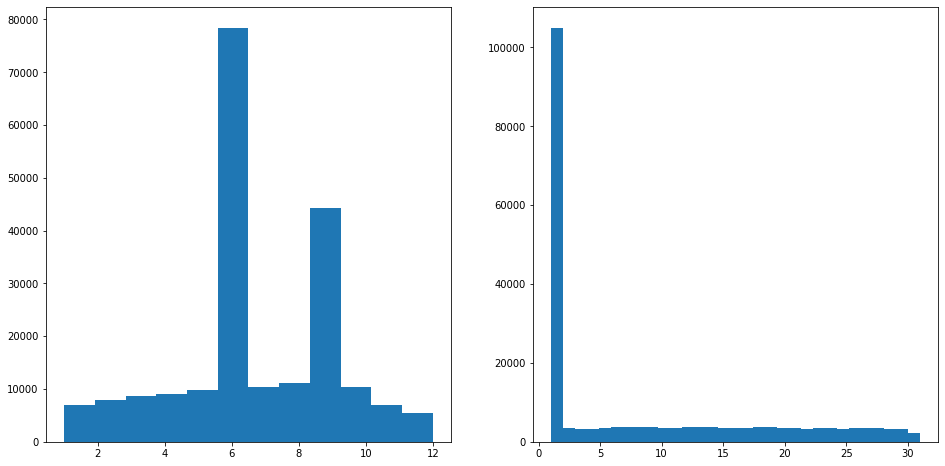

In [111]:
f, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(s[s['MEASYEAR']>=2015]['MEASMON'],bins=12)
ax[1].hist(s[s['MEASYEAR']>=2015]['MEASDAY'],bins=31)